In [11]:
import numpy as np
import pandas as pd
import altair as alt
from main import Model

# Force Altair to share axis range https://github.com/altair-viz/altair/issues/1298

In [12]:
# Scientist run
time_steps    = 50
theta_start   = 0.0
theta_end     = 1.0
theta_spacing = 0.1
theta_list    = np.arange(theta_start,theta_end+0.00001,theta_spacing)
theta_list    = [round(x,2) for x in theta_list]

scientists_datasets      = []
scientists_agg_df        = []
for theta in (theta_list):
    m = Model(time_steps,theta,'scientists') #model_name should be 'scientists', 'lobbyists'
    m.run()
    scientists_datasets.append(m.data)
    scientists_agg_df.append(m.agg_df)
scientists_merged_agent_data = pd.concat(scientists_datasets)
scientists_merged_agg_data   = pd.concat(scientists_agg_df)

In [13]:
# Lobbyists run
# time_steps    = 100
# theta_start   = 0.0
# theta_end     = 1.0
# theta_spacing = 0.1
# theta_list    = np.arange(theta_start,theta_end+0.00001,theta_spacing)
# theta_list    = [round(x,2) for x in theta_list]

lobbyists_datasets      = []
lobbyists_agg_df        = []
for theta in (theta_list):
    m2 = Model(time_steps,theta,'lobbyists') #model_name should be 'scientists', 'lobbyists'
    m2.run()
    lobbyists_datasets.append(m2.data)
    lobbyists_agg_df.append(m2.agg_df)
lobbyists_merged_agent_data = pd.concat(lobbyists_datasets)
lobbyists_merged_agg_data   = pd.concat(lobbyists_agg_df)

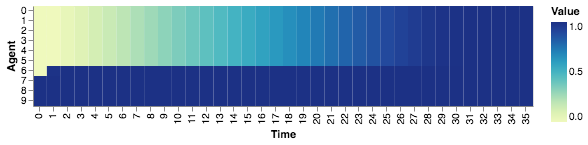

In [14]:
alt.data_transformers.enable('json')

slider = alt.binding_range(min=theta_start, max=theta_end, step=theta_spacing)
select_theta = alt.selection_single(name="Theta_Run", fields=['Theta_Run'],
                                   bind=slider, init={'Theta_Run': theta_start})


ts = alt.Chart(scientists_merged_agent_data).mark_rect().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Agent:O',
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
    color=alt.Color('Value:Q'),
).properties(
    width=500,
    height=100,
).add_selection(
    select_theta
).transform_filter(
    select_theta)

ts

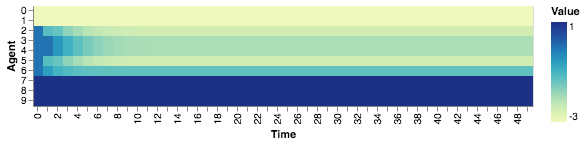

In [15]:
tl = alt.Chart(lobbyists_merged_agent_data).mark_rect().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Agent:O',
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
    color=alt.Color('Value:Q'),
).properties(
    width=500,
    height=100,
).add_selection(
    select_theta
).transform_filter(
    select_theta)

tl

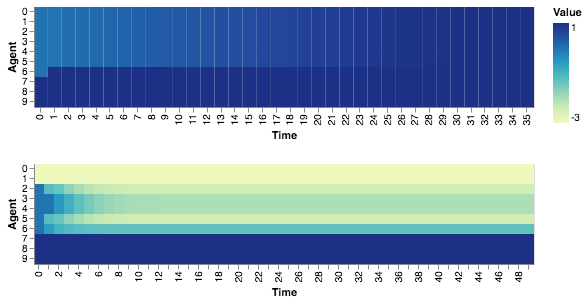

In [16]:
alt.vconcat(ts, tl)

In [17]:
cwidth  = 300
cheight = 100

sv = alt.Chart(scientists_merged_agg_data).mark_point().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Total_Value:Q',
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
#    color=alt.Color('Value:Q'),
).properties(
    width=cwidth,
    height=cheight,
    title="Scientists Run: Value"
).add_selection(
    select_theta
).transform_filter(
    select_theta)

sp = alt.Chart(scientists_merged_agg_data).mark_point().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Total_Prob:Q',
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
#    color=alt.Color('Value:Q'),
).properties(
    width=cwidth,
    height=cheight,
    title="Scientists Run: Probability"
).add_selection(
    select_theta
).transform_filter(
    select_theta)

sev = alt.Chart(scientists_merged_agg_data).mark_point().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Total_Expected_Value:Q',
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
#    color=alt.Color('Value:Q'),
).properties(
    width=cwidth,
    height=cheight,
    title="Scientists Run: Expected Value"
).add_selection(
    select_theta
).transform_filter(
    select_theta)


ss = alt.vconcat(
    sv,sp,sev,
).resolve_scale(
    y='shared'
)
# ss = alt.vconcat(v, p, ev)

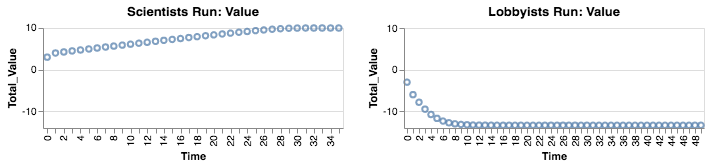

In [18]:
slider = alt.binding_range(min=theta_start, max=theta_end, step=theta_spacing)
select_theta = alt.selection_single(name="Theta_Run", fields=['Theta_Run'],
                                   bind=slider, init={'Theta_Run': theta_start})

lv = alt.Chart(lobbyists_merged_agg_data).mark_point().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Total_Value:Q',
#     y=('Total_Value:Q', scale=alt.Scale(domain=[2000, 2017])), #scale=alt.Scale(domain=(5,15))),
#     y=alt.Y('Total_Value:Q',scale=Scale(domain=(0.0,100))
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
#    color=alt.Color('Value:Q'),
).properties(
    width=cwidth,
    height=cheight,
    title="Lobbyists Run: Value"
).add_selection(
    select_theta
).transform_filter(
    select_theta)

lp = alt.Chart(lobbyists_merged_agg_data).mark_point().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Total_Prob:Q',
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
#    color=alt.Color('Value:Q'),
).properties(
    width=cwidth,
    height=cheight,
    title="Lobbyists Run: Probability"
).add_selection(
    select_theta
).transform_filter(
    select_theta)

lev = alt.Chart(lobbyists_merged_agg_data).mark_point().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Total_Expected_Value:Q',
#     color=alt.Color('Value:Q',legend=alt.Legend(values=[15]))  #values=[0.1,10.]))
#    color=alt.Color('Value:Q'),
).properties(
    width=cwidth,
    height=cheight,
    title="Lobbyists Run: Expected Value"
).add_selection(
    select_theta
).transform_filter(
    select_theta)

# ll = alt.vconcat(v, p, ev)
ll = alt.vconcat(
    lv,lp,lev,
).resolve_scale(
    y='shared'
)


alt.hconcat(
    sv, lv,
).resolve_scale(
    y='shared'
)

# ss | ll
# alt.hconcat(
#     ss,
#     ll
# ).resolve_scale(
#     y='shared'
# )

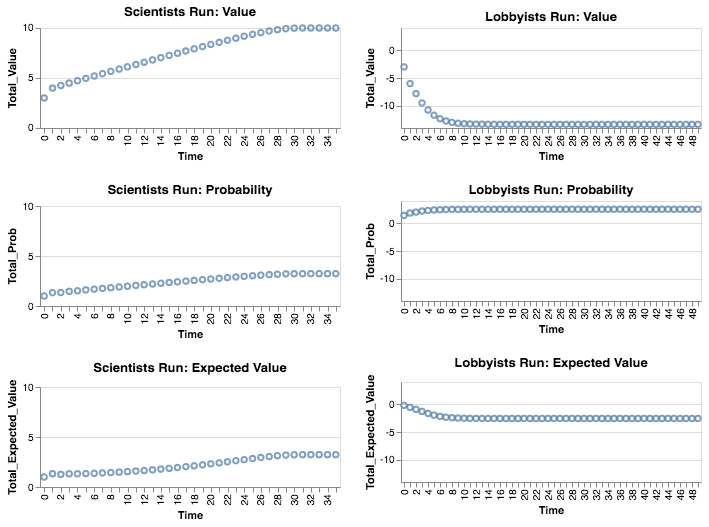

In [19]:
ss | ll

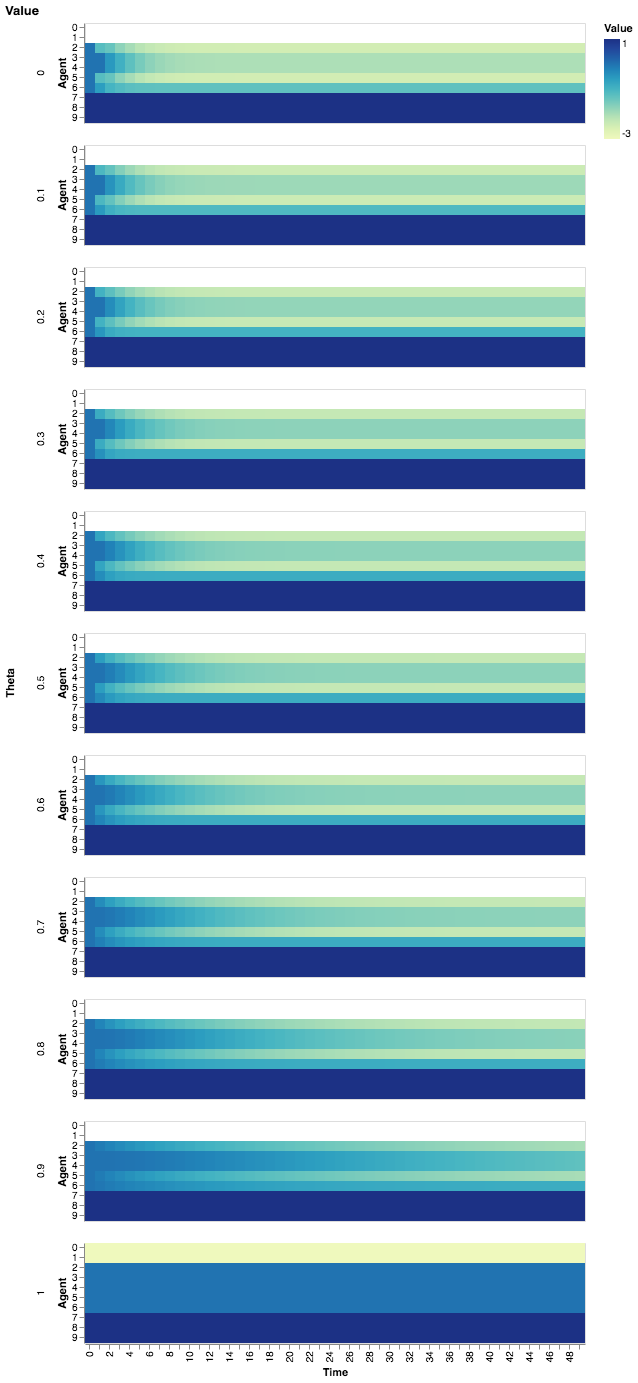

In [20]:
alt.data_transformers.enable('json')
alt.Chart(lobbyists_merged_agent_data).mark_rect().encode(
    #alt.X('Time', type='ordinal', title=''),
    x='Time:O',
    y='Agent:O',
    color='Value:Q',
    row = 'Theta:O'
    #color=alt.Color('Value:Q',legend=alt.Legend(title="Value"))
).properties(
    width=500,
    height=100,
    title='Value'
)

In [21]:
# alt.renderers.enable(embed_options = {'theme':'none'})
# val = alt.Chart(m.data).mark_rect().encode(
#     #alt.X('Time', type='ordinal', title=''),
#     x='Time:O',
#     y='Agent:O',
#     color='Value:Q',    
#     #color=alt.Color('Value:Q',legend=alt.Legend(title="Value"))
# ).properties(
#     width=500,
#     height=100,
#     title='Value'
# )


# prob = alt.Chart(m.data).mark_rect().encode(
#     #alt.X('Time', type='ordinal', title=''),
#     x='Time:O',
#     y='Agent:O',
#     color='Prob:Q',
# ).properties(
#     width=500,
#     height=100,
#     title='Probability'    
# )

# val_msg = alt.Chart(m.data).mark_rect().encode(
#     #alt.X('Time', type='ordinal', title=''),
#     x='Time:O',
#     y='Agent:O',
#     color='Value_Msg:Q',
# ).properties(
#     width=500,
#     height=100,
#     title='Value Message'     
# )

# prob_msg = alt.Chart(m.data).mark_rect().encode(
#     x='Time:O',
#     y='Agent:O',
#     color='Prob_Msg:Q',
# ).properties(
#     width=500,
#     height=100,
#     title='Probability Message'    
# )

# alt.vconcat(val, prob, val_msg, prob_msg)
